In [14]:
import kickass as ks
%matplotlib inline

In [3]:
import json
fd = open("../data/project_successful_final_tech_sample.json", "r")

project_json = json.load(fd)

In [4]:
ks_projects = ks.ProjectCollection(project_json, "../data/stopwords.txt")

In [5]:
#Cleaning documents---tokenizing words, removing stopwords, and stemming
ks_projects.clean_docs(2)


In [6]:
doc1 = ks_projects.docs[0]

In [7]:
doc_term = ks_projects.doc_term_dict()

In [8]:
docs_id = []
docs_tfidf = []
for key, value in doc_term.items():
    docs_id.append(key)
    docs_tfidf.append(value)
    

In [9]:
D, S, T = ks.np.linalg.svd(ks.np.array(docs_tfidf))

In [10]:
var = ks.np.cumsum(S ** 2) / sum(S ** 2)

In [11]:
var

array([ 0.0670923 ,  0.11672443,  0.16214823,  0.20494471,  0.24077748,
        0.27424869,  0.29964341,  0.32425092,  0.34754561,  0.3688215 ,
        0.3886763 ,  0.40784506,  0.42597565,  0.44341016,  0.46009219,
        0.47647861,  0.49218665,  0.5074558 ,  0.52234975,  0.53705263,
        0.55154956,  0.56519559,  0.57839155,  0.59150329,  0.60414098,
        0.61659496,  0.62872535,  0.64037612,  0.65188305,  0.663132  ,
        0.67398339,  0.68458457,  0.69481884,  0.70464118,  0.71430571,
        0.7237974 ,  0.732889  ,  0.74189656,  0.75084673,  0.75947607,
        0.76798708,  0.77633181,  0.78454351,  0.79225179,  0.79970087,
        0.80674587,  0.81362369,  0.82018723,  0.82658543,  0.83258157,
        0.83843343,  0.84418557,  0.84982186,  0.85535218,  0.86080091,
        0.86607459,  0.87125456,  0.87632704,  0.88132232,  0.88610018,
        0.89080034,  0.89537087,  0.89986224,  0.90426678,  0.90851964,
        0.91272322,  0.91684602,  0.92087106,  0.92487244,  0.92

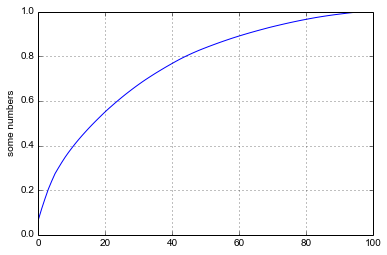

In [26]:
import matplotlib.pyplot as plt
import scipy as sc 
plt.plot(var)
plt.ylabel('some numbers')
#for i in sc.arange(0,1, 0.2):
#    plt.axhline(y= i, color = "black", )
plt.grid(True)
plt.show()
